# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
# importing keras layers for cnn
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# splitting the data to train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# LoadData

In [2]:
os.getcwd()
f1=h5py.File('SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5','r')
f2=h5py.File('SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5','r')

In [3]:
print("Photon data: ",list(f1.keys()))
print("Electron data: ",list(f2.keys()))
X_photon=np.array(f1.get('X'))
X_electron=np.array(f2.get('X'))
y_photon=np.array(f1.get('y'))
y_electron=np.array(f2.get('y'))

Photon data:  ['X', 'y']
Electron data:  ['X', 'y']


### Visualise data

Text(0.5, 1.0, 'Time')

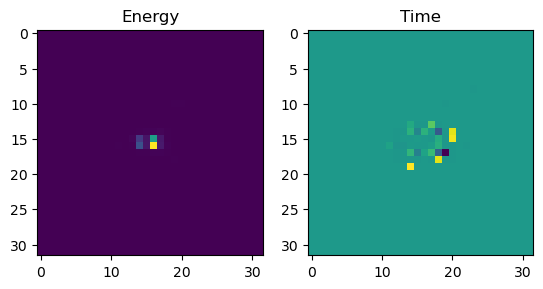

In [4]:
#photon sample data for training
plt.subplot(1,2,1)
plt.imshow(X_photon[0,:,:,0])
plt.title('Energy')

plt.subplot(1,2,2)
plt.imshow(X_photon[0,:,:,1])
plt.title('Time')

Text(0.5, 1.0, 'Time')

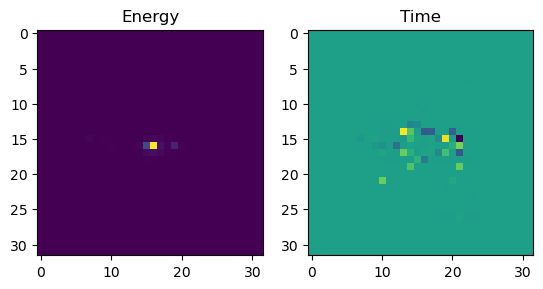

In [5]:
#electron sample data for training
plt.subplot(1,2,1)
plt.imshow(X_electron[0,:,:,0])
plt.title('Energy')

plt.subplot(1,2,2)
plt.imshow(X_electron[0,:,:,1])
plt.title('Time')

# Split Data

In [ ]:
X=np.concatenate((X_photon,X_electron),axis=0)
X

In [10]:
y=np.concatenate((y_photon,y_electron),axis=0)
y

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [ ]:
X_train,X_val,y_train,y_val= train_test_split(X_train,y_train,test_size=0.1,random_state=5)

In [ ]:
X_train.shape
# y_train.shape

# Prepare CNN Model

In [16]:
model=models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu',padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu',padding="same"))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding="same"))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding="same"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        608       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

#### Loss function and optimiser

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])

# Fit model

In [ ]:
hist=model.fit(X_train,y_train,batch_size=40,epochs=10,validation_data=(X_val,y_val),verbose=1)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
# y_pred=model.predict(X_test)
# l=y_pred.len()
# for i in range(l):
#     y_pred[i]=round(y_pred[i])

In [ ]:
# hist.history
roc_auc_score(y_test,y_pred)

# Save Model

In [6]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','photonelectronModel.h5'))

In [ ]:
# os.path.join('models','photonelectronModels.h5')
os.getcwd()

In [7]:
new_model= load_model(os.path.join('models','photonelectronModel.h5'))


# Prediction

In [12]:
# y_pred=model.predict(X_test)
y_pred=new_model.predict(X_test)

3113/3113 [==============================] - 61s 19ms/step


In [ ]:
# y_pred_int=(np.rint(y_pred)).astype(int)

In [14]:
auc_score=roc_auc_score(y_test,y_pred)
auc_score

0.8000454361800238

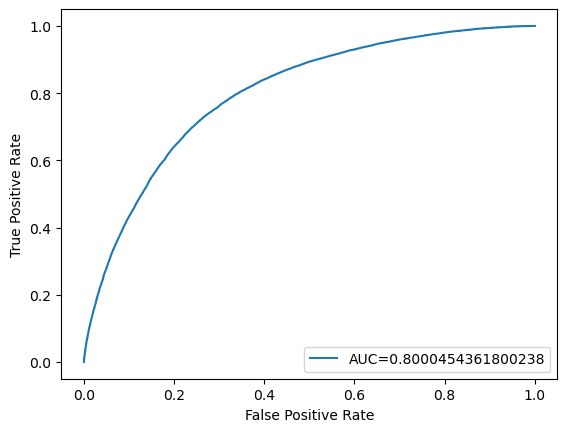

In [15]:
fpr, tpr, _ = roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc_score))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Pytorch Implementation

In [ ]:
# !pip install torchmetrics

In [ ]:
# !pip list

In [1]:
from sklearn.metrics import accuracy_score
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision.transforms import ToTensor
from torchmetrics.classification import BinaryAUROC

torch.__version__
# torchvision.__version__
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [4]:
os.getcwd()
f1=h5py.File('SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5','r')
f2=h5py.File('SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5','r')

In [5]:
print("Photon data: ",list(f1.keys()))
print("Electron data: ",list(f2.keys()))
X_photon=np.array(f1.get('X'))
X_electron=np.array(f2.get('X'))
y_photon=np.array(f1.get('y'))
y_electron=np.array(f2.get('y'))

Photon data:  ['X', 'y']
Electron data:  ['X', 'y']


# Split data 

In [6]:
X=np.concatenate((X_photon,X_electron),axis=0)

In [7]:
X=np.transpose(X,(0,3,1,2))
X.shape

(498000, 2, 32, 32)

In [8]:
y=np.concatenate((y_photon,y_electron),axis=0)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=16)

In [11]:
X_train.shape,X_test.shape

((398400, 2, 32, 32), (99600, 2, 32, 32))

## Prepare DataLoader

In [10]:
from torch.utils.data import DataLoader,TensorDataset
from torch  import Tensor
BATCH_SIZE=32

data_train=TensorDataset(Tensor(X_train[:,:,:,:]),Tensor(y_train[:]))# training
data_test= TensorDataset(Tensor(X_test[:,:,:,:]),Tensor(y_test[:]))#test

train_dataloader=DataLoader(data_train,batch_size=BATCH_SIZE,shuffle=False)
test_dataloader=DataLoader(data_test,batch_size=BATCH_SIZE,shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000023131C88E80>, <torch.utils.data.dataloader.DataLoader object at 0x0000023131C88AC0>)
Length of train dataloader: 12450 batches of 32
Length of test dataloader: 3113 batches of 32


In [41]:
# Check out what's inside the training dataloader
# training_batch,training_label= next(iter(train_dataloader_ene))
# training_batch.shape,training_label.shape

(torch.Size([32, 1, 32, 32]), torch.Size([32]))

In [124]:
# flatten_model=nn.Flatten()
# x=flatten_model(training_batch[0])
# x.shape

torch.Size([1, 1024])

## Functions- Timing, Train and Test loops

### Timing experiment

In [12]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Train and Test Loop

In [23]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = device):
    train_loss, train_acc, running_loss = 0, 0, 0
    c=0
    print("dataloaderLen: ",len(data_loader))
    for batch, (X,y) in enumerate(data_loader):
        c=c+1
        y = y.unsqueeze(1).float()
        # Send data to CPU
        X, y = X.to(device), y.to(device)
        # X,y= data
        # 1. Forward pass
        y_pred = model(X)
        # print(y_pred.squeeze(dim=1),y.squeeze(dim=1))
    
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        running_loss+= loss
        acc=BinaryAUROC(thresholds=None)
        train_acc += acc(y_pred.squeeze(dim=1),y.squeeze(dim=1))
        
        if batch % 100 == 99:    # print every 100 mini-batches
            print(f'{batch + 1:5d} loss: {running_loss / 100:.5f}')
            running_loss = 0.0
        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()
        # if c==500:
            # break

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.5f}%")

In [15]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    c=0
    # Turn on inference context manager
    with torch.no_grad():
        for X,y in data_loader:
            # Send data to CPU
            y = y.unsqueeze(1).float()
            X, y = X.to(device), y.to(device)
            c+=1
            
            model.eval() # put model in eval mode
            
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            acc=BinaryAUROC(thresholds=None)
            test_acc += acc(test_pred.squeeze(dim=1),y.squeeze(dim=1))
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.5f}%\n")

## Prepare Model

In [18]:
class Model(nn.Module):
    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=640,
                      out_features=output_shape),
            nn.Sigmoid()
        )
    def forward(self,x: torch.Tensor):
        x=self.block_1(x)
        x=self.block_2(x)
        x=self.classifier(x)
        return x
torch.manual_seed(30)
model_= Model(input_shape=2,hidden_units=10,output_shape=1).to(device)
model_

Model(
  (block_1): Sequential(
    (0): Conv2d(2, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=1, bias=True)
    (2): Sigmoid()
  )
)

#### Sample Conv2d and MaxPool

In [20]:
#creating sample conv2d layer
training_batch,label= next(iter(train_dataloader_ene))
training_batch.shape
torch.manual_seed(30)

test_img= training_batch[0]
test_img=test_img.unsqueeze(dim=0)
# test_img.shape
conv_layer = nn.Conv2d(in_channels=1,
                       out_channels=10,
                       kernel_size=3,
                       stride=2,
                       padding=0) # also try using "valid" or "same" here 
test_img_through_conv=conv_layer(test_img)
test_img_through_conv.shape

torch.Size([1, 10, 15, 15])

In [21]:
# Creating sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_img_through_conv_maxpool = max_pool_layer(test_img_through_conv)
test_img_through_conv_maxpool.shape

torch.Size([1, 10, 7, 7])

### Setup Loss Func and Optimizer

In [19]:
criterion=nn.BCELoss()
optimizer= torch.optim.Adam(params=model_.parameters(),lr=0.07)

### Accuracy Function

In [18]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    # print(correct,len(y_pred))
    acc = (correct / len(y_pred)) * 100
    return acc

### Training and Testing

In [20]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(30)
# Measure time
from timeit import default_timer as timer
train_time_start_model = timer()

# Train and test model
epochs = 1
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_,
        loss_fn=criterion,
        optimizer=optimizer,
        device=device)

train_time_end_model = timer()
total_train_time_model = print_train_time(start=train_time_start_model,
                                           end=train_time_end_model,
                                           device=device)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
---------
dataloaderLen:  12450
  100 loss: 0.23758
  200 loss: 0.23145
  300 loss: 0.23138
  400 loss: 0.23173
  500 loss: 0.23182
  600 loss: 0.23176
  700 loss: 0.23103
  800 loss: 0.23190
  900 loss: 0.23140
 1000 loss: 0.23142
 1100 loss: 0.23163
 1200 loss: 0.23152
 1300 loss: 0.23174
 1400 loss: 0.23178
 1500 loss: 0.23167
 1600 loss: 0.23153
 1700 loss: 0.23159
 1800 loss: 0.23141
 1900 loss: 0.23154
 2000 loss: 0.23155
 2100 loss: 0.23142
 2200 loss: 0.23136
 2300 loss: 0.23138
 2400 loss: 0.23141
 2500 loss: 0.23150
 2600 loss: 0.23162
 2700 loss: 0.23145
 2800 loss: 0.23130
 2900 loss: 0.23187
 3000 loss: 0.23270
 3100 loss: 0.23087
 3200 loss: 0.23173
 3300 loss: 0.23151
 3400 loss: 0.23143
 3500 loss: 0.23208
 3600 loss: 0.23126
 3700 loss: 0.23150
 3800 loss: 0.23145
 3900 loss: 0.23154
 4000 loss: 0.23111
 4100 loss: 0.23157
 4200 loss: 0.23133
 4300 loss: 0.23156
 4400 loss: 0.23117
 4500 loss: 0.23150
 4600 loss: 0.23174
 4700 loss: 0.23165
 4800 loss: 0.23168

In [22]:
test_step(data_loader=test_dataloader,
    model=model_,
    loss_fn=criterion,
    device=device
)

Test loss: 0.69393 | Test accuracy: 0.50000%



### Saving Model

In [21]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)
MODEL_NAME = "pytorch_model_electron_photon_c(1).pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_.state_dict(),f=MODEL_SAVE_PATH)

Saving Model to: models\pytorch_model_electron_photon_c(1).pth


In [24]:
loaded_model= Model(input_shape=2,hidden_units=10,output_shape=1)
# Load in the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model = loaded_model.to(device)
loaded_model

Model(
  (block_1): Sequential(
    (0): Conv2d(2, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=1, bias=True)
    (2): Sigmoid()
  )
)

In [25]:
test_step(data_loader=test_dataloader,
    model=loaded_model,
    loss_fn=criterion,
    device=device
)

Test loss: 0.69393 | Test accuracy: 0.50000%

